# Loss functions
> In this chapter you will discover the conceptual framework behind logistic regression and SVMs. This will let you delve deeper into the inner workings of these models. This is the Summary of lecture "Linear Classifiers in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: images/log_hinge.png

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear classifiers - the coefficients
- Dot Products
    - `x@y` is called the dot product of `x` and `y`, and is written $x \cdot y$
- Linear Classifier predictions
    - raw model output = coefficients $\cdot$ features + intercept
    - Linear classifier prediction: compute raw model output, check the sign
        - if positive, predict one class
        - if negative, predict the other class
    - This is the same for logistic regression and linear SVM
        - `fit` is different but `predict` is the same

### Changing the model coefficients
When you call `fit` with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. In this exercise you will explore how the decision boundary is represented by the coefficients. To do so, you will change the coefficients manually (instead of with `fit`), and visualize the resulting classifiers.

In [2]:
#hide
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

In [3]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

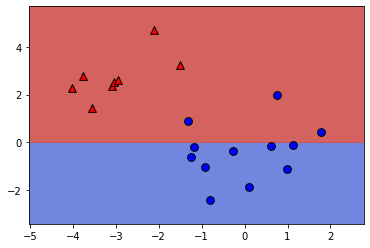

Number of errors: 3


In [5]:
# Set the coefficients
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

## What is a loss function?
- Least squares: the squared loss
    - scikit-learn's `LinearRegression` minimizes a loss:
    $$ \sum_{i=1}^{n}(\text{true ith target value - predicted ith target value})^2 $$
    - Minimization is with respect to coefficients or parameters of the model.
- Classification errors: the 0-1 loss
    - Squared loss not appropriate for classification problems
    - A natrual loss for classification problem is the number of errors
    - This is the **0-1 loss**: it's 0 for a correct prediction and 1 for an incorrect prediction
    - But this loss is hard to minimize

### Minimizing a loss function
In this exercise you'll implement linear regression "from scratch" using `scipy.optimize.minimize`.

We'll train a model on the Boston housing price data set.

In [6]:
X = pd.read_csv('./dataset/boston_X.csv').to_numpy()
y = pd.read_csv('./dataset/boston_y.csv').to_numpy()

In [7]:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# The squared error, summed overt training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred) ** 2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X, y)
print(lr.coef_)

[-9.16298525e-02  4.86755134e-02 -3.77647962e-03  2.85635806e+00
 -2.88074603e+00  5.92522231e+00 -7.22459484e-03 -9.67997914e-01
  1.70448274e-01 -9.38966357e-03 -3.92421957e-01  1.49830960e-02
 -4.16972109e-01]
[[-9.16297843e-02  4.86751203e-02 -3.77930006e-03  2.85636751e+00
  -2.88077933e+00  5.92521432e+00 -7.22447929e-03 -9.67995240e-01
   1.70443393e-01 -9.38925373e-03 -3.92425680e-01  1.49832102e-02
  -4.16972624e-01]]


## Loss function diagrams

### Comparing the logistic and hinge losses
In this exercise you'll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you.

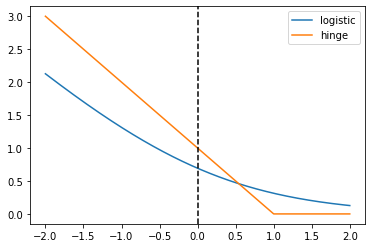

In [9]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
    return np.log(1 + np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
    return np.maximum(0, 1 - raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic');
plt.plot(grid, hinge_loss(grid), label='hinge');
plt.axvline(x=0, linestyle='dashed', color='k')
plt.legend();

### Implementing logistic regression
This is very similar to the earlier exercise where you implemented linear regression "from scratch" using `scipy.optimize.minimize`. However, this time we'll minimize the logistic loss and compare with scikit-learn's `LogisticRegression`.

The `log_loss()` function from the previous exercise is already defined in your environment, and the sklearn breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables `X` and `y`.

In [10]:
X = pd.read_csv('./dataset/breast_X.csv').to_numpy()
y = pd.read_csv('./dataset/breast_y.csv').to_numpy()

In [11]:
# logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X, y)
print(lr.coef_)

[ 1.03614857 -1.65378453  4.08306703 -9.4092245  -1.06786857  0.07893722
 -0.85110258 -2.44102697 -0.45285622  0.43353259]
[[ 1.03665946 -1.65380077  4.08233062 -9.40904867 -1.06787935  0.07901598
  -0.85099843 -2.44107473 -0.45288928  0.43348202]]


C:\Users\kcsgo\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


As you can see, logistic regression is just minimizing the loss function we've been looking at. 